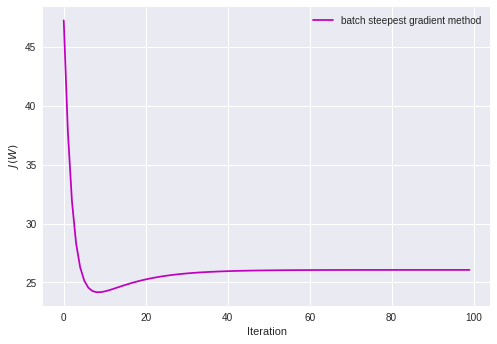

BSG score:0.75


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def dataset():
    n = 40
    omega = np.random.randn(1)
    noise = 0.8 * np.random.randn(n)
    x = np.random.randn(n, 2)
    y = omega * x[:, 0] + x[:, 1] + noise > 0
    y = np.array(list(map(lambda x: 1 if x else -1, y)))
    return x, y

class BatchSteepestGradientModel(object):
    def __init__(self, eta=0.5, gamma=1.0):
        self.W = 0
        self.eta = eta
        self.gamma = gamma

    def fit(self, X, Y, epochs=100):
        if len(X.shape) == 1:
            X = X.reshape(1, -1)
        else:
            X = X.T

        if len(Y.shape) == 1:
            Y = Y.reshape(1, -1)
        else:
            Y = Y.T

        self.W = np.random.randn(
            X.shape[0], Y.shape[0])

        Ws = np.array([self.W])

        for epoch in range(epochs):
            self.W -= (self.eta
                       * (((-Y * X * np.exp(-Y * np.dot(self.W.T, X)))
                            / (1 + np.exp(-Y * np.dot(self.W.T, X)))).sum()
                       + 2 * self.gamma * self.W))
            Ws = np.append(Ws, [self.W], axis=0)

        return Ws

    def predict(self, X):
        if len(X.shape) == 1:
            X.reshape(-1, 1)
        else:
            X = X.T

        Y_pred = np.dot(
            self.W.T, X)
        Y_pred = Y_pred > 0
        Y_pred = np.array(
            list(map(lambda x: 1 if x else -1, Y_pred.reshape(-1))))

        return Y_pred

    def score(self, X, Y):
        Y_pred = self.predict(X)
        return (Y == Y_pred).sum() / len(Y)
      
np.random.seed(88)

def J(W, X, y, gamma):
	return np.log(1 + np.exp(-y * W.T.dot(X))).sum() + gamma * W.T.dot(W)

gamma = 5
eta = 1 / (2 * 10 * gamma)

X, y = dataset()

BSG = BatchSteepestGradientModel(eta=eta, gamma=gamma)
W_BSG = BSG.fit(X, y)
W_BSG_J = np.array([J(W, X.T, y.reshape(1, -1), gamma).reshape(-1) for W in W_BSG])
plt.plot(range(100), W_BSG_J[:100], "m", label="batch steepest gradient method")

plt.legend()
plt.xlabel("Iteration")
plt.ylabel("$J(W)$")
plt.show()

print('BSG score:{0}'.format(BSG.score(X,y)))